In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error

np.random.seed(42)

n = 200
X = np.linspace(0, 10, n)
y = 3 * X + np.random.normal(0, 3, n)

df = pd.DataFrame({"X": X, "y": y})

# Missing completely at random (MCAR)
missing_idx = np.random.choice(n, size=40, replace=False)
df.loc[missing_idx, "y"] = np.nan

**Mean value Imputation**

In [6]:
mean_imp = SimpleImputer(strategy="mean")
df_mean = df.copy()
df_mean["y_imp"] = mean_imp.fit_transform(df[["y"]])

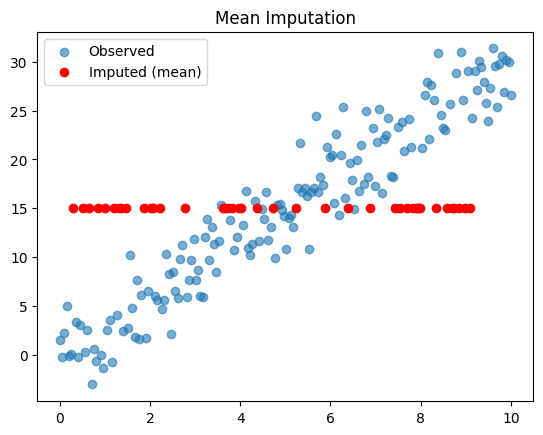

In [7]:
plt.figure()
plt.scatter(df["X"], df["y"], label="Observed", alpha=0.6)
plt.scatter(df.loc[missing_idx, "X"],
            df_mean.loc[missing_idx, "y_imp"],
            color="red", label="Imputed (mean)")
plt.legend()
plt.title("Mean Imputation")
plt.show()

**Linear Fit**

In [8]:
obs = df.dropna()
miss = df[df["y"].isna()]

lr = LinearRegression()
lr.fit(obs[["X"]], obs["y"])

df_reg = df.copy()
df_reg.loc[missing_idx, "y_imp"] = lr.predict(miss[["X"]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


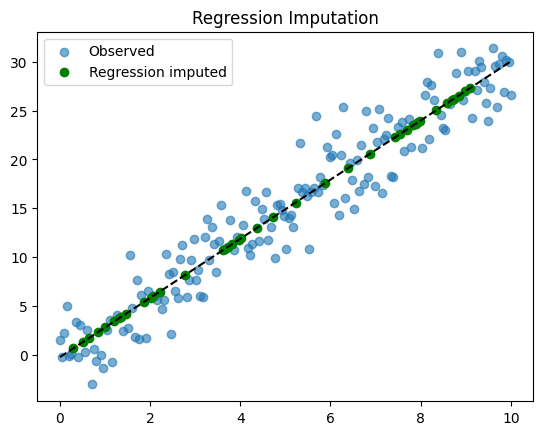

In [9]:
plt.figure()
plt.scatter(obs["X"], obs["y"], alpha=0.6, label="Observed")
plt.scatter(miss["X"], df_reg.loc[missing_idx, "y_imp"],
            color="green", label="Regression imputed")
plt.plot(X, lr.predict(X.reshape(-1,1)), color="black", linestyle="--")
plt.legend()
plt.title("Regression Imputation")
plt.show()

Good if we want to capture mean but not variance!!

**Stochastic**

In [10]:
residuals = obs["y"] - lr.predict(obs[["X"]])
sigma = residuals.std()

df_stoch = df.copy()
df_stoch.loc[missing_idx, "y_imp"] = (
    lr.predict(miss[["X"]]) +
    np.random.normal(0, sigma, size=len(miss))
)

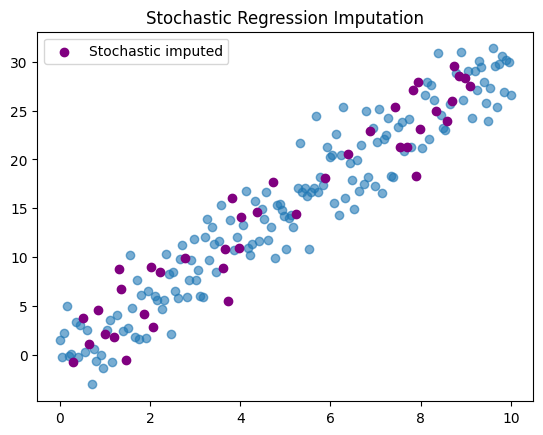

In [11]:
plt.figure()
plt.scatter(obs["X"], obs["y"], alpha=0.6)
plt.scatter(miss["X"], df_stoch.loc[missing_idx, "y_imp"],
            color="purple", label="Stochastic imputed")
plt.legend()
plt.title("Stochastic Regression Imputation")
plt.show()

Captures variance well !!

**KNN Imputation**

In [12]:
knn_imp = KNNImputer(n_neighbors=5)
df_knn = df.copy()
df_knn["y_imp"] = knn_imp.fit_transform(df)[ :,1]

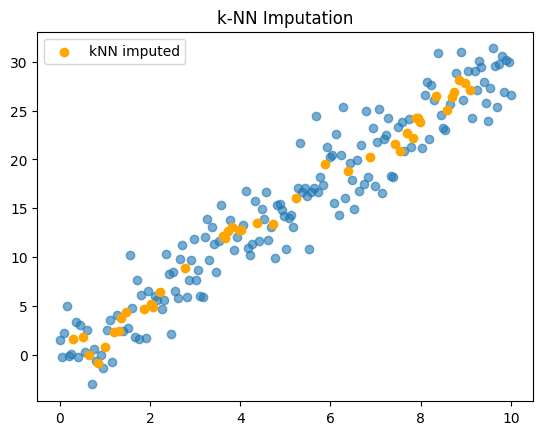

In [13]:
plt.figure()
plt.scatter(df["X"], df["y"], alpha=0.6)
plt.scatter(df.loc[missing_idx, "X"],
            df_knn.loc[missing_idx, "y_imp"],
            color="orange", label="kNN imputed")
plt.legend()
plt.title("k-NN Imputation")
plt.show()

**MICE**

In [14]:
# Multivariate Imputation by Chained Equations
iter_imp = IterativeImputer(random_state=0)
df_iter = df.copy()
df_iter["y_imp"] = iter_imp.fit_transform(df)[ :,1]

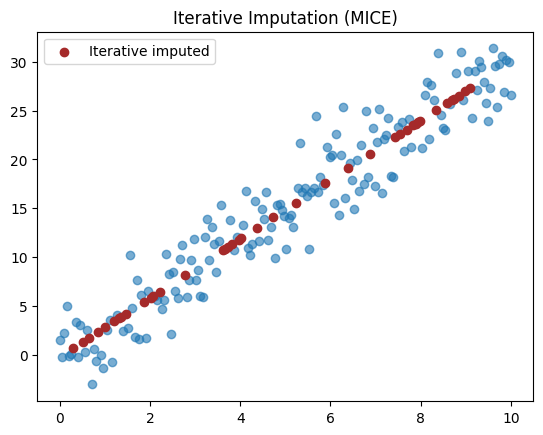

In [15]:
plt.figure()
plt.scatter(df["X"], df["y"], alpha=0.6)
plt.scatter(df.loc[missing_idx, "X"],
            df_iter.loc[missing_idx, "y_imp"],
            color="brown", label="Iterative imputed")
plt.legend()
plt.title("Iterative Imputation (MICE)")
plt.show()

In [16]:
true_y = y[missing_idx]

def rmse(yhat):
    return np.sqrt(mean_squared_error(true_y, yhat))

print("Mean:", rmse(df_mean.loc[missing_idx, "y_imp"]))
print("Regression:", rmse(df_reg.loc[missing_idx, "y_imp"]))
print("Stochastic:", rmse(df_stoch.loc[missing_idx, "y_imp"]))
print("kNN:", rmse(df_knn.loc[missing_idx, "y_imp"]))
print("Iterative:", rmse(df_iter.loc[missing_idx, "y_imp"]))

Mean: 10.13915575393752
Regression: 14.0933261499164
Stochastic: 13.41334624579941
kNN: 3.52211486394121
Iterative: 3.299241963816927


Task: Build a model to compare the imputation strategy